In [1]:
# %matplotlib qt

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from knn import KNN
from findingDory import FindingDory
from sklearn.neighbors import KNeighborsClassifier

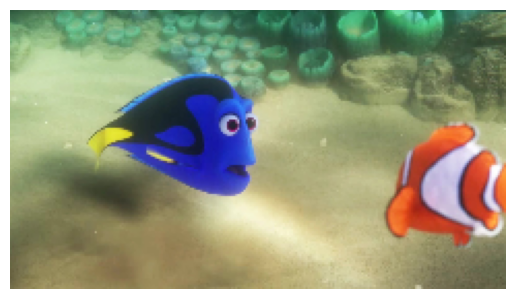

In [3]:
nemo = cv2.imread('input/dory1.jpg')
nemo = cv2.resize(nemo, (0,0), fx=.15, fy=.15)
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.axis('off')
plt.show()

In [4]:
nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
pixels_list_hsv = nemo_hsv.reshape(-1, 3)

# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(projection='3d')

# ax.scatter(pixels_list_hsv[:,0], pixels_list_hsv[:,1], pixels_list_hsv[:,2], c=pixels_list_rgb/255)
# ax.set_xlabel('H')
# ax.set_ylabel('S')
# ax.set_zlabel('V')
# plt.show()

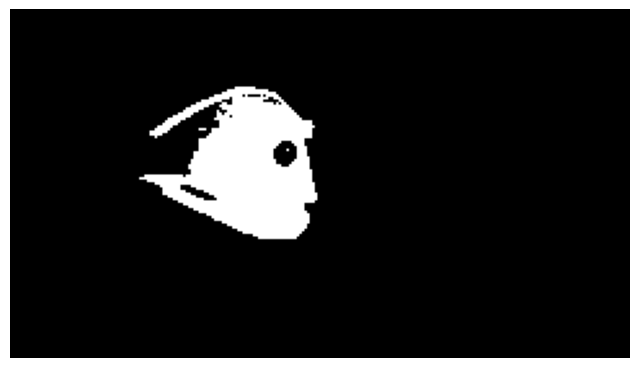

In [5]:
light_orange = (90, 100, 20)
dark_orange = (130, 255, 255)

plt.figure(figsize=(8,8))
mask_orange = cv2.inRange(nemo_hsv, light_orange, dark_orange)
plt.imshow(mask_orange, cmap='gray')
plt.axis('off')
plt.show()

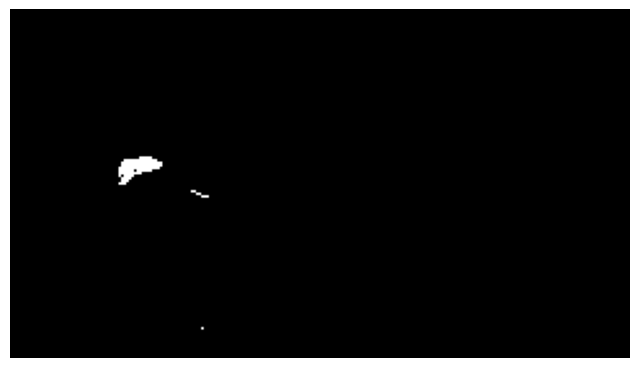

In [6]:
light_white = (20, 120, 150)
dark_white = (30, 255, 255)

plt.figure(figsize=(8,8))
mask_white = cv2.inRange(nemo_hsv, light_white, dark_white)
plt.imshow(mask_white, cmap='gray')
plt.axis('off')
plt.show()

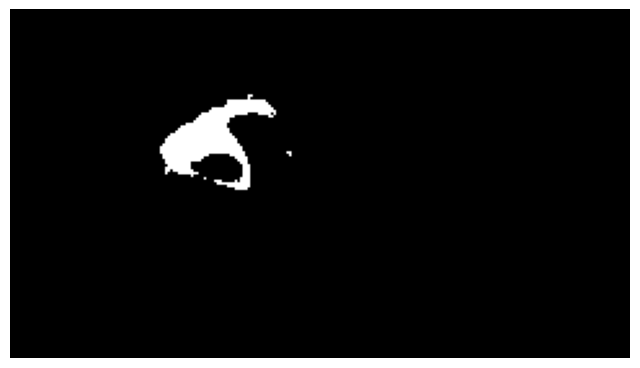

In [7]:
light_black = (45, 0, 5)
dark_black = (120, 255, 60)

plt.figure(figsize=(8,8))
mask_black = cv2.inRange(nemo_hsv, light_black, dark_black)
plt.imshow(mask_black, cmap='gray')
plt.axis('off')
plt.show()

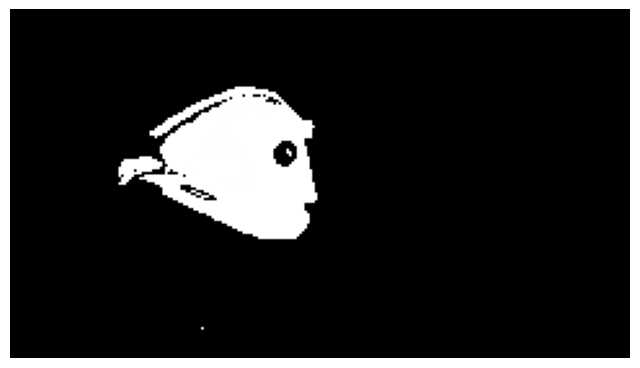

In [8]:
final_mask = mask_orange + mask_white + mask_black

plt.figure(figsize=(8,8))
plt.imshow(final_mask, cmap='gray')
plt.axis('off')
plt.show()

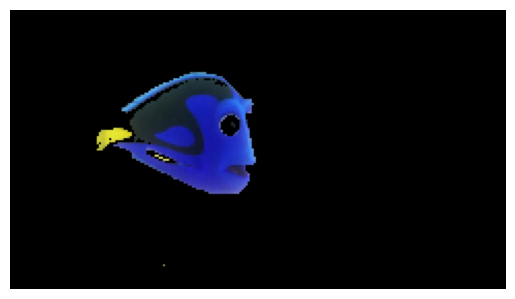

In [9]:
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.imshow(final_result)
plt.axis('off')
plt.show()

In [10]:
X_train = pixels_list_hsv / 255
X_train.shape

(32400, 3)

In [11]:
Y_train = final_mask.reshape(-1,) // 255
Y_train.shape

(32400,)

In [12]:
Y_train[20000:20100]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

# KNN

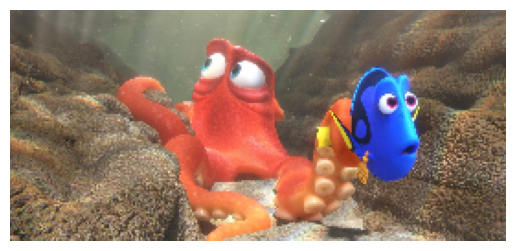

In [15]:
test_image = cv2.imread('input/dory2.jpg')
test_image = cv2.resize(test_image, (0,0), fx=.15, fy=.15)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.axis('off')
plt.show()

## class

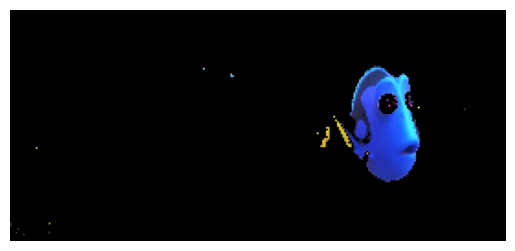

In [16]:
findingDory = FindingDory(nemo)
final_result = findingDory.remove_background(test_image, (0, 0, 0))
plt.imshow(final_result)
plt.axis('off')
plt.show()